In [4]:
import numpy as np
import pandas as pd
from matplotlib import gridspec
import matplotlib.pyplot as plt
import seaborn as sns
from figures.figureCommon import subplotLabel, getSetup
from tfac.tensor import decomp_to_flipped_factors, partial_tucker_decomp, flip_factors
from Data_Mod import form_tensor
from dataHelpers import importLINCSprotein, proteinNames

ImportError: attempted relative import with no known parent package

In [ ]:
components = 5
results, treatmentList, times = decomp_to_flipped_factors(components)
treatmentTime = results[0]

componeDict = {}

#Initialize an empty dictionary of lists
for treatment in treatmentList:
    componeDict[treatment] = []


counter = 0
#Create a dictionary with treatments as keys and the treatment value list as the value
for keyTreatment in componeDict:
    counter1 = 0
    for timeList in treatmentTime[counter]:
        componeDict[keyTreatment].append(timeList[0])
        counter1+=1
    counter+=1

#Plot the times against 
for treatment in treatmentList:
    plt.plot(times, componeDict[treatment], label=treatmentList[counter])
    counter+=1
plt.legend()
plt.title("Component 1 v.s. Times")



Text(0.5, 1.0, 'Component 4 v.s. Times')

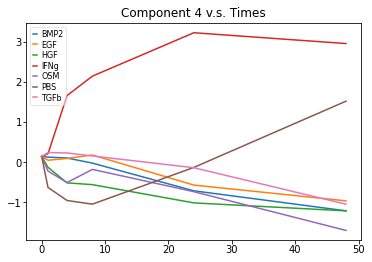

In [13]:
components = 5
results, treatmentList, times = decomp_to_flipped_factors(components)
treatmentTime = results[0]

compfourDict = {}

#Initialize an empty dictionary of lists
for treatment in treatmentList:
    compfourDict[treatment] = []


counter = 0
#Create a dictionary with treatments as keys and the treatment value list as the value
for keyTreatment in compfourDict:
    counter1 = 0
    for timeList in treatmentTime[counter]:
        compfourDict[keyTreatment].append(timeList[3])
        counter1+=1
    counter+=1

counter = 0

#Plot the times against 
for treatment in treatmentList:
    plt.plot(times, compfourDict[treatment], label=treatmentList[counter])
    counter+=1
plt.legend()
plt.title("Component 4 v.s. Times")

In [3]:
components = 5
results, treatmentList, times = decomp_to_flipped_factors(components)
treatmentTime = results[0]

compfiveDict = {}

print(treatmentTime[0][3])

#Initialize an empty dictionary of lists
for treatment in treatmentList:
    compfiveDict[treatment] = []


counter = 0
#Create a dictionary with treatments as keys and the treatment value list as the value
for keyTreatment in compfiveDict:
    counter1 = 0
    for timeList in treatmentTime[counter]:
        compfiveDict[keyTreatment].append(timeList[4])
        counter1+=1
    counter+=1

counter = 0

#Plot the times against 
for treatment in treatmentList:
    plt.plot(times, compfiveDict[treatment], label=treatmentList[counter])
    counter+=1
plt.legend()
plt.title("Component 5 v.s. Times")

NameError: name 'decomp_to_flipped_factors' is not defined

In [ ]:
components = 5
results, treatmentList, times = decomp_to_flipped_factors(components)

proteinFactors = results[1][0]
proteinList = proteinNames()

comp1Vals = []
comp2Vals = []
comp3Vals = []
comp4Vals = []
comp5Vals = []

for compVals in proteinFactors:
    comp1Vals.append(compVals[0])
    comp2Vals.append(compVals[1])
    comp3Vals.append(compVals[2])
    comp4Vals.append(compVals[3])
    comp5Vals.append(compVals[4])

plt.figure(figsize=(70,10))

plt.scatter(proteinList, comp1Vals, label = 'Component 1')
plt.scatter(proteinList, comp2Vals, label = 'Component 2')
plt.scatter(proteinList, comp3Vals, label = 'Component 3')
plt.scatter(proteinList, comp4Vals, label = 'Component 4')
plt.scatter(proteinList, comp5Vals, label = 'Component 5')


plt.xticks(proteinList, proteinList, rotation='vertical')

plt.legend(loc=2, prop={'size': 20})


<AxesSubplot:>

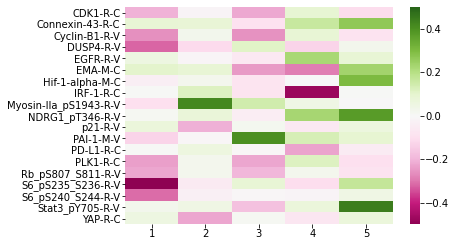

In [11]:
result = partial_tucker_decomp(form_tensor()[0], [2], rank=5)
result = flip_factors(result)

# this takes the list of arrays from results 1, of shape 1, 295, 5 and puts it into a dataFrame of shape 295, 5 (row, col)
protMap = pd.DataFrame(result[1][0].T, columns=proteinNames())
sel = np.max(np.absolute(protMap.values), axis=0)  # creates a np array of the max values of each of the proteins

# This is the code to remove unnecessary proteins and label everything
protMap = protMap.loc[:, sel > 0.2]

# now protMap has all of the correct names and dropped proteins // transverse to make plot look better
sns.heatmap(protMap.T, cmap='PiYG', vmin=-0.5, vmax=0.5, xticklabels=protMap.index + 1)


Text(0.5, 1.0, 'Component 5 v.s. Times')

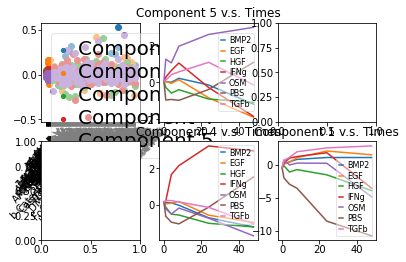

<Figure size 14400x720 with 0 Axes>

In [26]:



fig, ax = plt.subplots(2, 3)
fig = plt.figure(figsize=(200, 10))

ax[0, 0].scatter(proteinList, comp1Vals, label = 'Component 1')
ax[0, 0].scatter(proteinList, comp2Vals, label = 'Component 2')
ax[0, 0].scatter(proteinList, comp3Vals, label = 'Component 3')
ax[0, 0].scatter(proteinList, comp4Vals, label = 'Component 4')
ax[0, 0].scatter(proteinList, comp5Vals, label = 'Component 5')
ax[0, 0].set_xticklabels(proteinList, rotation=45)
ax[0, 0].legend(loc=2, prop={'size': 20})
ax[0, 0]

counter = 0
for treatment in treatmentList:
    ax[1, 2].plot(times, componeDict[treatment], label=treatmentList[counter])
    counter+=1
ax[1, 2].set_title("Component 1 v.s. Times")
ax[1, 2].legend()


counter = 0
for treatment in treatmentList:
    ax[1, 1].plot(times, compfourDict[treatment], label=treatmentList[counter])
    counter+=1
ax[1, 1].legend()
ax[1, 1].set_title("Component 4 v.s. Times")

counter=0
for treatment in treatmentList:
    ax[0, 1].plot(times, compfiveDict[treatment], label=treatmentList[counter])
    counter+=1
ax[0, 1].legend()
ax[0, 1].set_title("Component 5 v.s. Times")






In [17]:
row = 1
col = 1
ax, f = getSetup((7, 12), (row, col))
ax[0].set_title("Protein-Component Heat Plot")
protein_heatmap(ax[0])
subplotLabel(ax)

TypeError: type() takes 1 or 3 arguments